In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier 
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('diabetes_unclean.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Notice that the data entry is zero in some of the important features such as skin thickness, glucose and insulin which is impossible. hence it is good to imputate values and scale them for better results. For this comparison, the base model is going to be run using both cleaned and uncleaned data.

### separate features and labels, further cleaning of data

In [13]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [15]:
# assigning unclean data to variables for test/train split
X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# changing zero to null for imputation
df["Glucose"] = df["Glucose"].apply(lambda x: np.nan if x == 0 else x)
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: np.nan if x == 0 else x)
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: np.nan if x == 0 else x)
df["Insulin"] = df["Insulin"].apply(lambda x: np.nan if x == 0 else x)
df["BMI"] = df["BMI"].apply(lambda x: np.nan if x == 0 else x)

<Axes: >

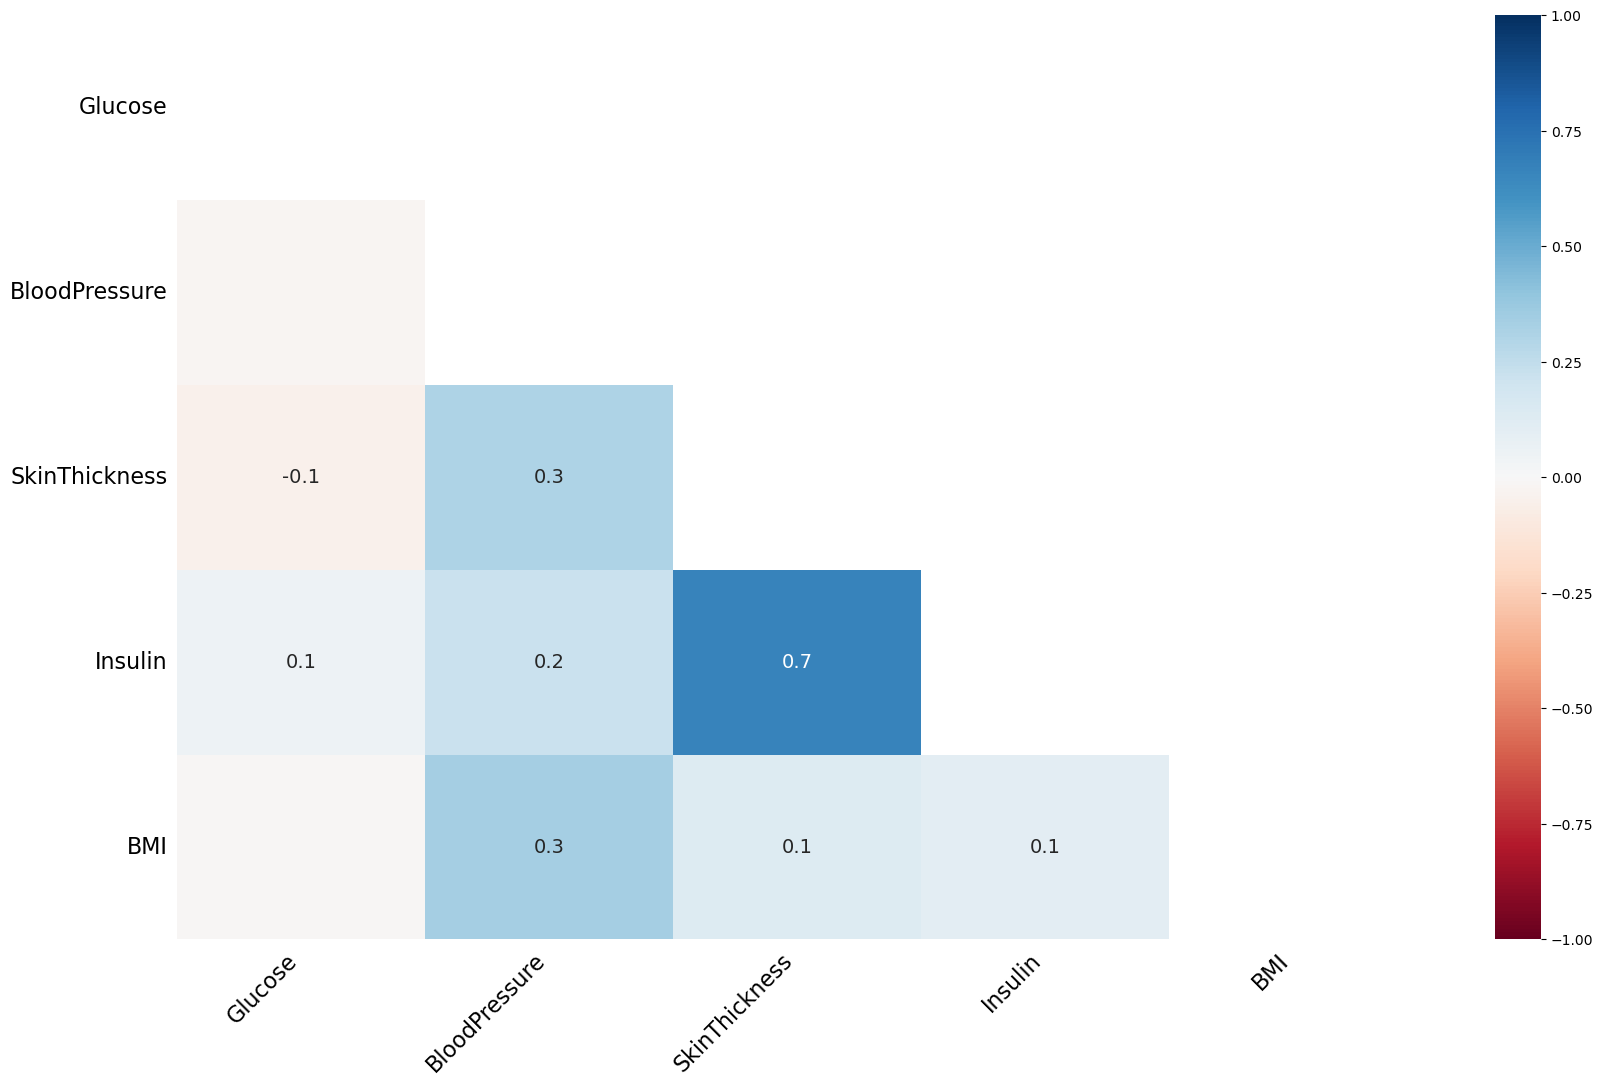

In [19]:
# nullity correlation
msno.heatmap(df)

In [21]:
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

about 50% of insulin column is null, since the amount og insulin plays an important role in deciding whether a person has diabetes or not, it is better to imputate the missing values. In thiscase instead of using mean or median imputation, KNN imputation is going to be carried out

In [23]:
#data = pd.read_csv('diabetes.csv')

In [23]:
# Separate features and target for cleaning
X_c = df.drop('Outcome', axis=1)
y_c = df['Outcome']

In [25]:
X_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


Impute and then scale

In [27]:
# Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_c), columns=X_c.columns)

In [29]:
# Scaling
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_c.columns)


In [31]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_scaled, y_c, test_size=0.2, random_state=42)

### exploring data

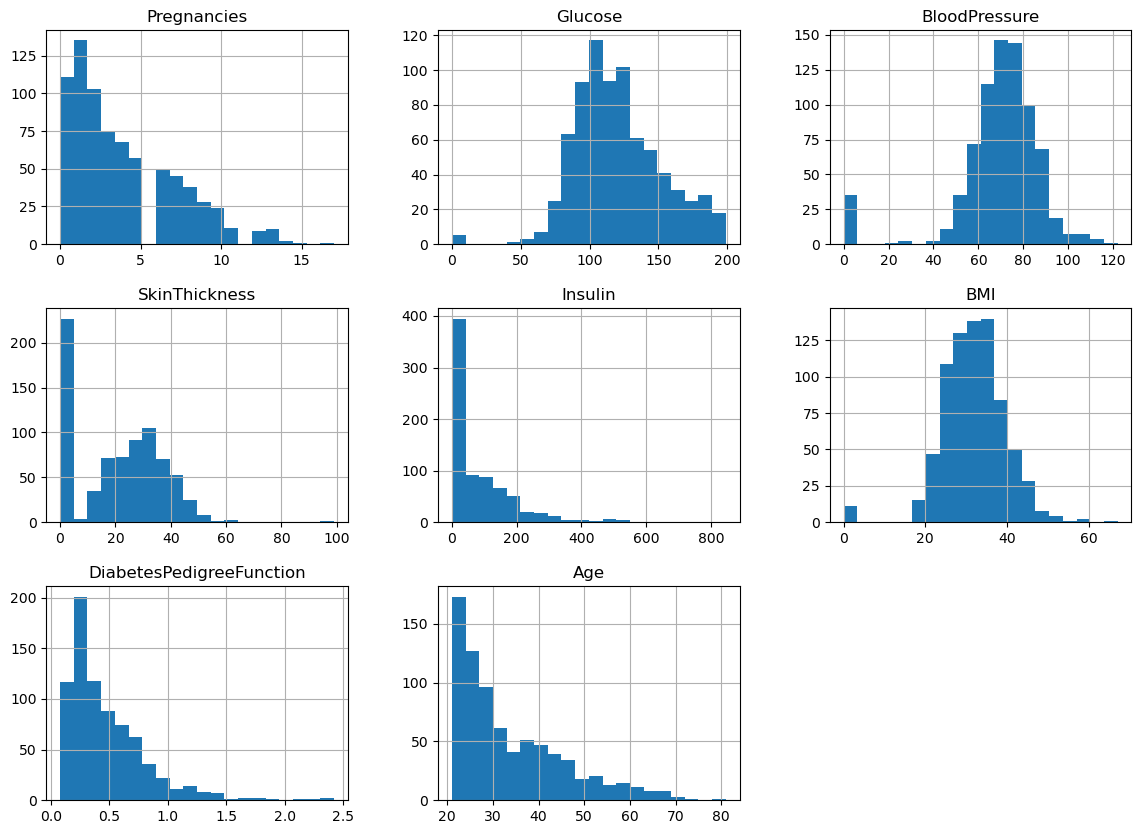

In [33]:
#unclean features
X.hist(bins = 20, figsize = (14,10))
plt.show()

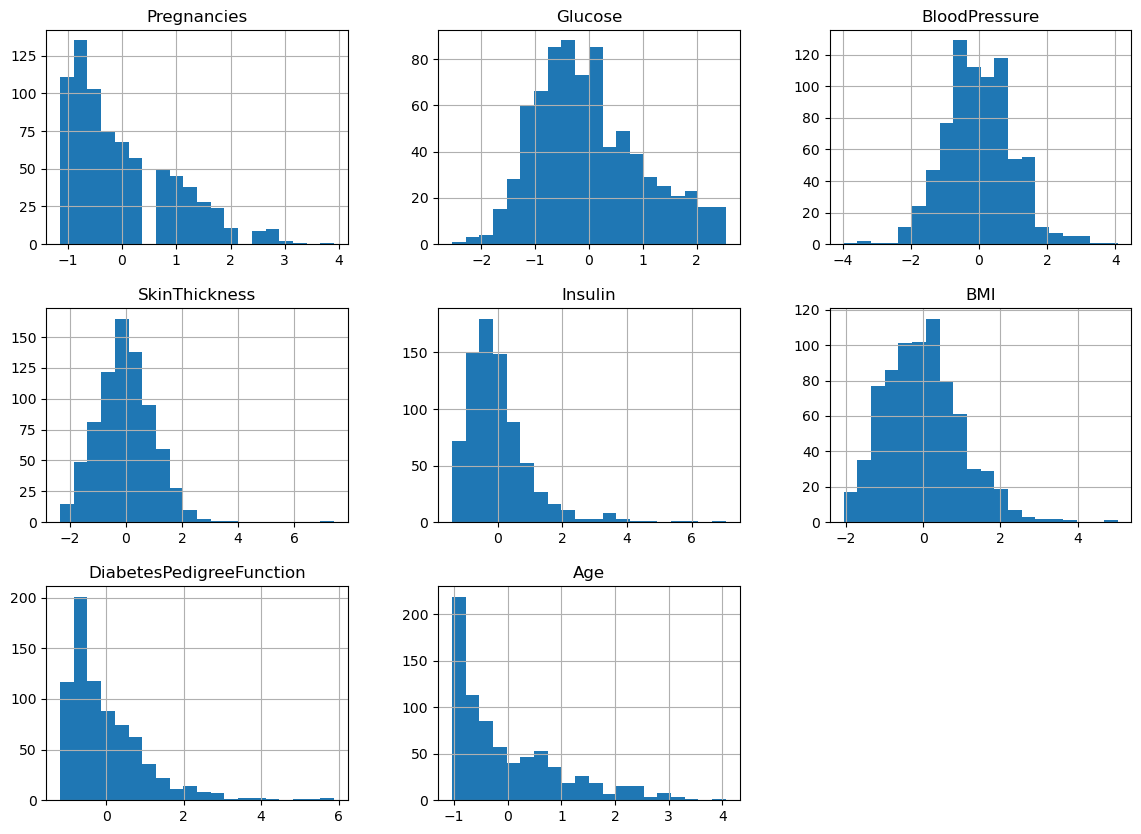

In [35]:
# cleaned features
X_scaled.hist(bins = 20, figsize = (14,10))
plt.show()

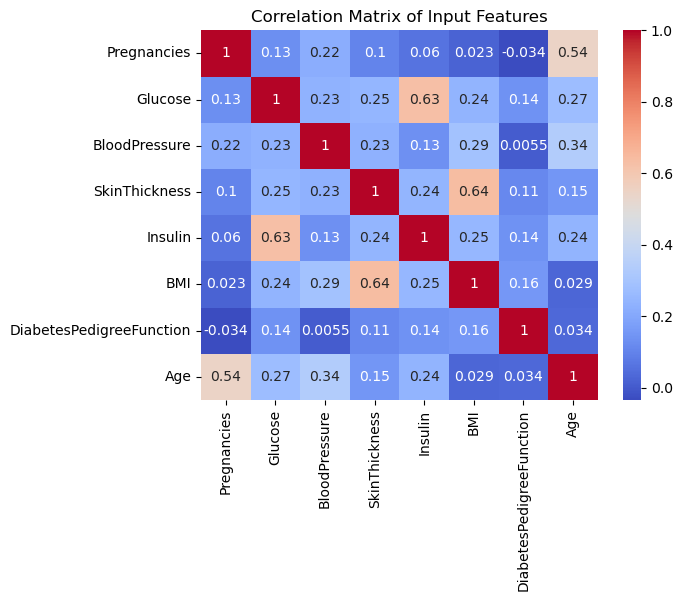

In [37]:
# Correlation matrix of features
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Input Features')
plt.show()

### Adding target for further analysis

In [39]:
X_final = pd.concat([X_scaled, y_c], axis=1)

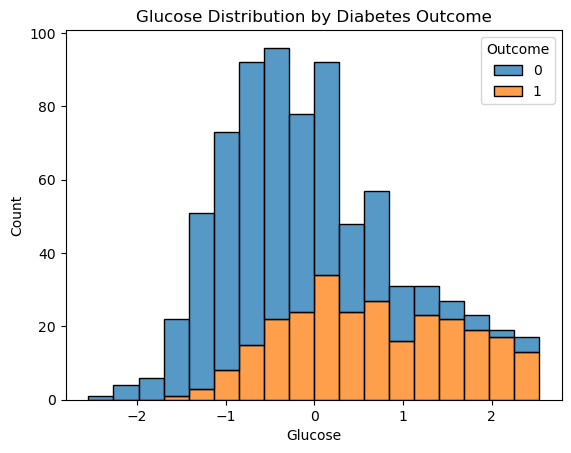

In [41]:
# Compare the distribution of Glucose for different Outcome groups
sns.histplot(data=X_final, x='Glucose', hue='Outcome', multiple='stack')
plt.title('Glucose Distribution by Diabetes Outcome')
plt.show()

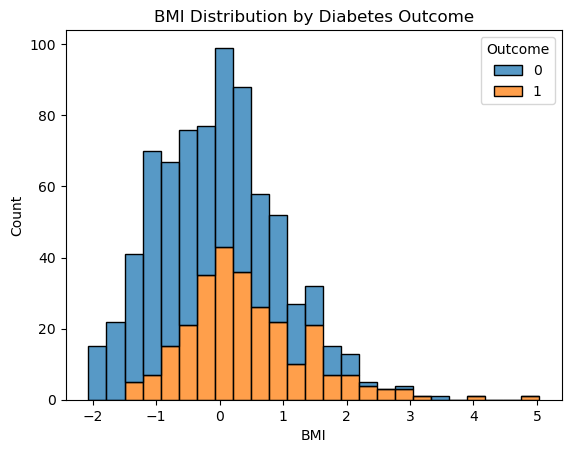

In [43]:
# Compare the distribution of BMI for different Outcome groups
sns.histplot(data=X_final, x='BMI', hue='Outcome', multiple='stack')
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()

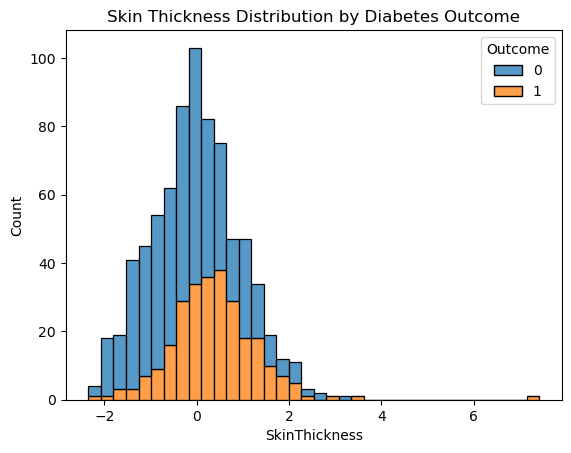

In [45]:
# Compare the distribution of Skin Thickness for different Outcome groups
sns.histplot(data=X_final, x='SkinThickness', hue='Outcome', multiple='stack')
plt.title('Skin Thickness Distribution by Diabetes Outcome')
plt.show()

In [47]:
# Correlation of input features with the target variable (Outcome)
correlations = X_final.corr()['Outcome'].sort_values(ascending=False)
print(correlations)

Outcome                     1.000000
Glucose                     0.495853
Insulin                     0.319100
BMI                         0.313379
SkinThickness               0.278439
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.176388
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


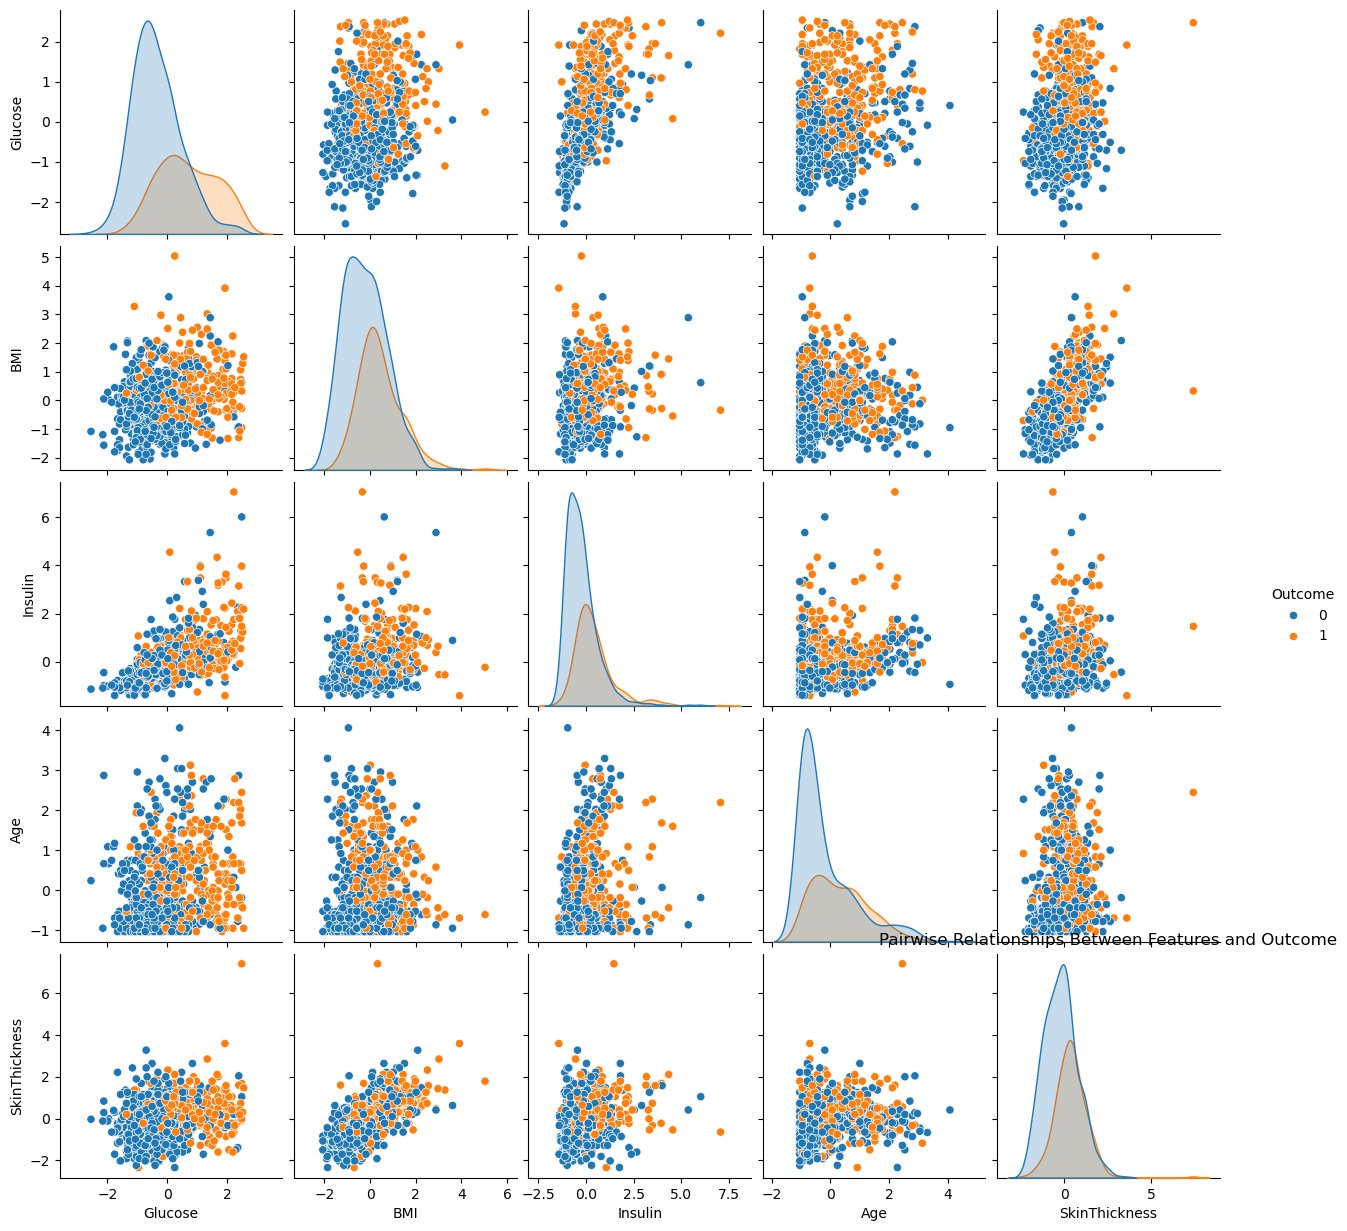

In [49]:
# Visualize pairwise relationships and outcome
sns.pairplot(X_final, hue='Outcome', vars=['Glucose', 'BMI', 'Insulin','Age','SkinThickness'])
plt.title('Pairwise Relationships Between Features and Outcome')
plt.show()

### Modelling

In [51]:
#from tensorflow.keras.callbacks import EarlyStopping

In [53]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [51]:
# Base Model Definition (Single Perceptron)
def build_base_model(optimizer='adam', learning_rate=0.1):
    model = Sequential()
    model.add(Dense(1, activation='sigmoid'))  # Single perceptron
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
# 5. Train Base Model on Uncleaned Data
model_uncleaned = build_base_model()
history_uncleaned = model_uncleaned.fit(X_train_uncleaned, y_train_uncleaned, epochs=50, batch_size=10, validation_data=(X_test_uncleaned, y_test_uncleaned), verbose=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.5793 - loss: 8.2548 - val_accuracy: 0.6883 - val_loss: 3.5353
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.6070 - loss: 3.5075 - val_accuracy: 0.6558 - val_loss: 3.0540
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5979 - loss: 2.4460 - val_accuracy: 0.6039 - val_loss: 2.0402
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5508 - loss: 2.6501 - val_accuracy: 0.5584 - val_loss: 2.4434
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.5792 - loss: 3.4074 - val_accuracy: 0.5584 - val_loss: 2.8818
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.5889 - loss: 3.9592 - val_accuracy: 0.7013 - val_loss: 1.4252
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5977 - loss: 2.9655 - val_accuracy: 0.6558 - val_loss: 5.1688
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.6311 - loss: 2.1933 - val_accuracy: 0.

In [55]:
# 6. Train Base Model on Cleaned Data
model_cleaned = build_base_model()
history_cleaned = model_cleaned.fit(X_train_cleaned, y_train_cleaned, epochs=50, batch_size=10, validation_data=(X_test_cleaned, y_test_cleaned), verbose=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.6787 - loss: 0.5948 - val_accuracy: 0.7597 - val_loss: 0.4976
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7674 - loss: 0.4967 - val_accuracy: 0.7143 - val_loss: 0.5380
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7825 - loss: 0.4630 - val_accuracy: 0.7338 - val_loss: 0.5419
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.7479 - loss: 0.4963 - val_accuracy: 0.7857 - val_loss: 0.4965
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.7448 - loss: 0.5074 - val_accuracy: 0.7468 - val_loss: 0.5477
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.7334 - loss: 0.5397 - val_accuracy: 0.7468 - val_loss: 0.5247
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.7723 - loss: 0.4992 - val_accuracy: 0.7208 - val_loss: 0.5173
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.7723 - loss: 0.4596 - val_accuracy: 0.

In [57]:
# 7. Plot Accuracy and Loss Curves for Cleaned vs Uncleaned Data
def plot_history(histories, title):
    for label, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{label} - Training')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    for label, history in histories.items():
        plt.plot(history.history['loss'], label=f'{label} - Training')
        plt.plot(history.history['val_loss'], label=f'{label} - Validation')
    plt.title(f'{title} Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

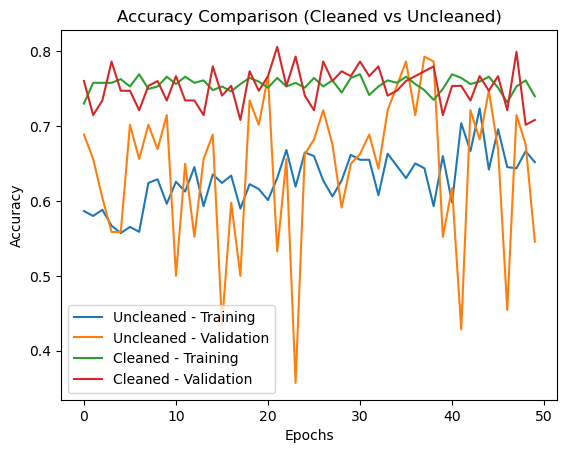

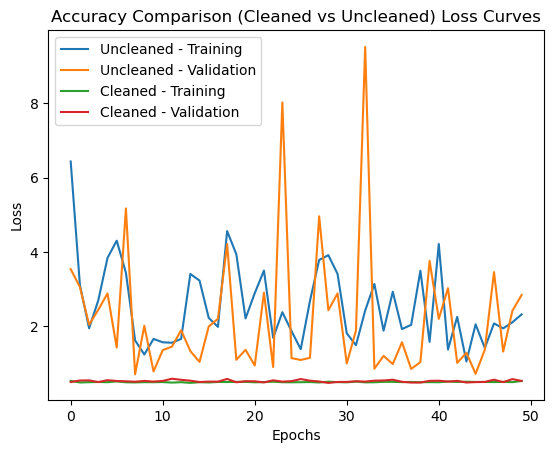

In [59]:
# Plot accuracy and loss for both models
plot_history({'Uncleaned': history_uncleaned, 'Cleaned': history_cleaned}, 'Accuracy Comparison (Cleaned vs Uncleaned)')

In [61]:
# Evaluate the Models on the Test Data
test_loss_uncleaned, test_acc_uncleaned = model_uncleaned.evaluate(X_test_uncleaned, y_test_uncleaned, verbose=0)
test_loss_cleaned, test_acc_cleaned = model_cleaned.evaluate(X_test_cleaned, y_test_cleaned, verbose=0)

print(f"Uncleaned Test Accuracy: {test_acc_uncleaned:.4f}")
print(f"Cleaned Test Accuracy: {test_acc_cleaned:.4f}")

Uncleaned Test Accuracy: 0.5455
Cleaned Test Accuracy: 0.7078


In [79]:
##### new try
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Dmodel-building function with L2 regularization
def build_model(learning_rate=0.001, optimizer='adam', l2_penalty=0.01):
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train_cleaned.shape[1],)))
    
    # Output layer with L2 regularization
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_penalty)))
    
    # Select optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [87]:
# Wrap the model with KerasClassifier (include L2 penalty directly)
model_tune = KerasClassifier(
    model=build_model,    # Model-building function
    verbose=0,            # No output during training
    optimizer="adam",     # Default optimizer
    learning_rate=0.001,  # Default learning rate
    l2_penalty=0.01      # Set default L2 penalty
)

# Define the parameter grid for grid search
param_grid = {
    'batch_size': [10, 20],           # Tune batch size
    'epochs': [100, 200, 300],              # Tune number of epochs
    'optimizer': ['adam'], # Tune optimizer
    'learning_rate': [0.001, 0.01]    # Tune learning rate
}

# Perform grid search
grid = GridSearchCV(estimator=model_tune, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train_cleaned, y_train_cleaned, verbose=2)

# Extract the best parameters
best_params = grid_result.best_params_
print(f"Best Grid Search Accuracy: {grid_result.best_score_:.4f}")
print(f"Best Parameters: {grid_result.best_params_}")


Epoch 1/100
41/41 - 0s - 4ms/step - accuracy: 0.4841 - loss: 0.8475
Epoch 2/100
41/41 - 0s - 323us/step - accuracy: 0.5379 - loss: 0.8150
Epoch 3/100
41/41 - 0s - 343us/step - accuracy: 0.5550 - loss: 0.7863
Epoch 4/100
41/41 - 0s - 332us/step - accuracy: 0.5795 - loss: 0.7602
Epoch 5/100
41/41 - 0s - 311us/step - accuracy: 0.6015 - loss: 0.7371
Epoch 6/100
41/41 - 0s - 325us/step - accuracy: 0.5990 - loss: 0.7163
Epoch 7/100
41/41 - 0s - 318us/step - accuracy: 0.6235 - loss: 0.6971
Epoch 8/100
41/41 - 0s - 326us/step - accuracy: 0.6357 - loss: 0.6804
Epoch 9/100
41/41 - 0s - 326us/step - accuracy: 0.6553 - loss: 0.6653
Epoch 10/100
41/41 - 0s - 317us/step - accuracy: 0.6724 - loss: 0.6518
Epoch 11/100
41/41 - 0s - 313us/step - accuracy: 0.6748 - loss: 0.6396
Epoch 12/100
41/41 - 0s - 325us/step - accuracy: 0.6822 - loss: 0.6285
Epoch 13/100
41/41 - 0s - 325us/step - accuracy: 0.6870 - loss: 0.6183
Epoch 14/100
41/41 - 0s - 323us/step - accuracy: 0.6944 - loss: 0.6092
Epoch 15/100
41/4

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

# Build the model using the best parameters from grid search
model_best = build_model(
    learning_rate=best_params['learning_rate'], 
    optimizer=best_params['optimizer'], 
    l2_penalty=0.01  # Keep the same L2 penalty used in model_tune
)

# Early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the best model with early stopping
history_best = model_best.fit(X_train_cleaned, y_train_cleaned, 
                              epochs=best_params['epochs'], 
                              batch_size=best_params['batch_size'], 
                              validation_data=(X_test_cleaned, y_test_cleaned), 
                              verbose=1, 
                              callbacks=[early_stopping])


Epoch 1/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.4221 - loss: 0.9288 - val_accuracy: 0.6494 - val_loss: 0.6511
Epoch 2/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.7274 - loss: 0.5590 - val_accuracy: 0.7078 - val_loss: 0.5778
Epoch 3/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7336 - loss: 0.5250 - val_accuracy: 0.7403 - val_loss: 0.5455
Epoch 4/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7432 - loss: 0.5221 - val_accuracy: 0.7403 - val_loss: 0.5284
Epoch 5/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.7690 - loss: 0.5002 - val_accuracy: 0.7532 - val_loss: 0.5140
Epoch 6/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7485 - loss: 0.4962 - val_accuracy: 0.7662 - val_loss: 0.5086
Epoch 7/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7573 - loss: 0.4934 - val_accuracy: 0.7597 - val_loss: 0.5048
Epoch 8/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7648 - loss: 0.4990 - val_accu

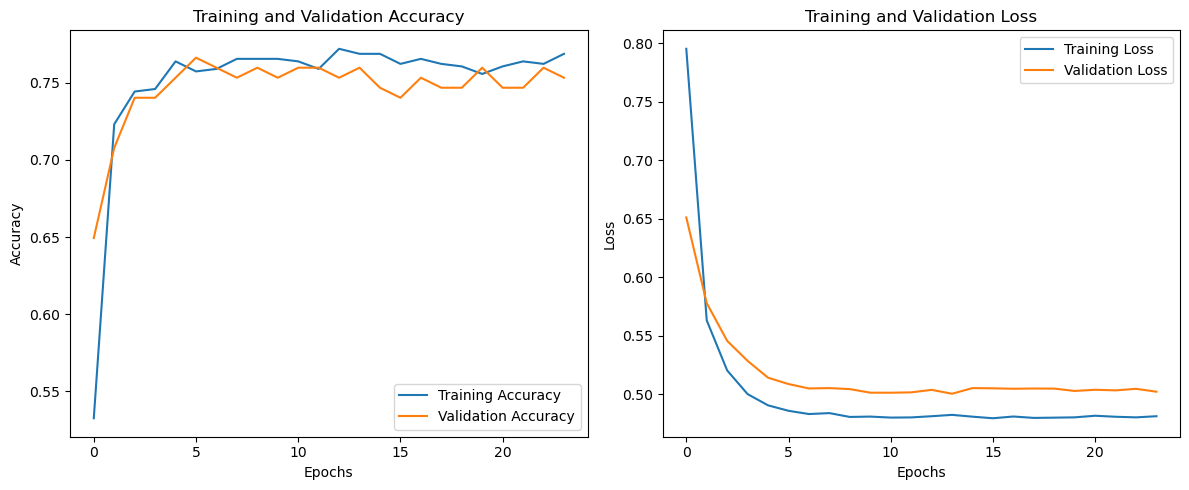

In [95]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss curves
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the history for the best model
plot_history(history_best)
